In [3]:
import pandas as pd
import numpy as np

In [4]:
#Correcnt Directroty
import os
print(os.getcwd())

/content


In [5]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Taking The Raw Source Data From UCI Irvine:
https://archive.ics.uci.edu/dataset/327/phishing+websites

In [6]:
USIIL = pd.read_csv('/content/drive/MyDrive/Project/csv_result-Training Dataset.csv')

#Basic Analysis for (5) Data

In [7]:
USIIL.sample(5)

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
6109,6110,-1,-1,1,1,1,-1,1,0,-1,...,-1,1,-1,1,1,-1,1,1,1,-1
4648,4649,1,1,1,1,1,1,0,-1,-1,...,1,1,1,1,1,-1,-1,-1,1,1
6260,6261,1,-1,1,1,1,-1,1,0,1,...,1,1,-1,1,-1,-1,1,0,1,-1
3173,3174,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,-1,0,-1,1,0,1,-1
2624,2625,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,0,-1,1,0,1,1


In [8]:
#Show all features
USIIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

#EDA ( Exploratory Data Analysis )

In [9]:
USIIL.shape

(11055, 32)

#CHECK NULL VALUE

In [10]:
USIIL.isnull().sum()

,0
id,0
having_IP_Address,0
URL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0


In [11]:
USIIL.describe()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Identify Highly Correlated Features


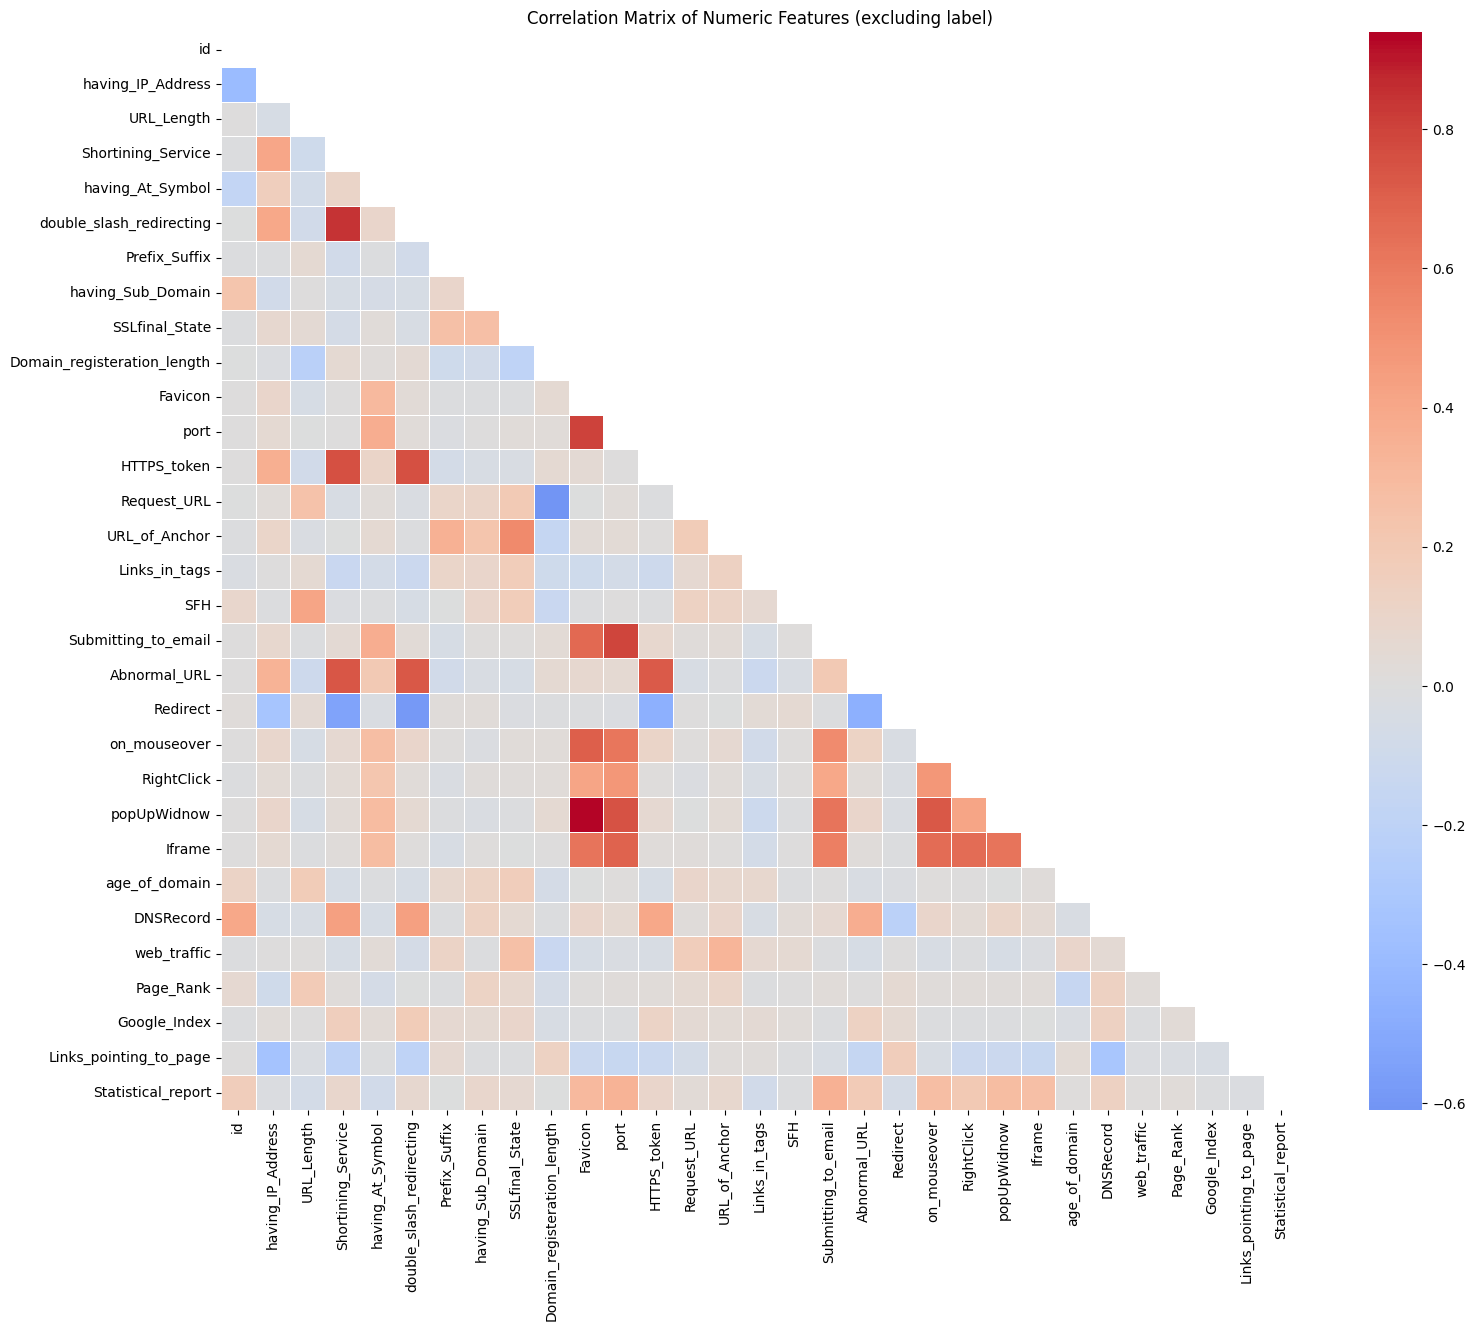

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Drop non-numeric columns temporarily for correlation check
numeric_df = USIIL.select_dtypes(include=[np.number]).drop(columns=['Result'])  #  dataset (probably a DataFrame).
#✅This line selects only the numeric columns (ignores text, dates, etc.).
#✅Then it drops the column 'label', because you probably don't want to include the target variable (label) when checking feature correlations.

# Calculate the correlation matrix
corr_matrix = numeric_df.corr() #Calculates the correlation matrix.
#Each value shows the correlation coefficient between two features:
#+1 = perfect positive correlation
#-1 = perfect negative correlation
#0 = no correlation



# Create a mask to hide the upper triangle (to reduce duplicate values)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#np.triu() creates a mask that covers the upper triangle of the correlation matrix.
#Correlation matrices are symmetric (feature A with feature B = feature B with feature A), so hiding half avoids redundancy.



# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, annot=False, fmt=".2f")
#Uses Seaborn’s heatmap function:
#corr_matrix is what we plot.
#mask=mask hides the top triangle.
#cmap='coolwarm' gives a color range (blue for negative, red for positive correlations).
#center=0 centers the color map at zero.
#square=True makes the boxes square.
#linewidths=.5 draws thin white lines between boxes.
#annot=False means no numbers inside boxes (cleaner look).
#fmt=".2f" would format numbers if annot=True.



plt.title("Correlation Matrix of Numeric Features (excluding label)")
plt.show()

#List Highly Correlated Pairs (> 0.85)

In [13]:
# Flatten correlation matrix and sort
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self correlations
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Filter to show only those above 0.85 (or choose your threshold)
high_corr = corr_pairs[corr_pairs > 0.85]
print(high_corr)

Favicon      popUpWidnow    0.939633
popUpWidnow  Favicon        0.939633
dtype: float64


#Find Low Correlation Features


In [14]:
# Get correlation of features with the target
correlation_with_Result = USIIL.corr(numeric_only=True)['Result'].sort_values()

# View low-correlation features
low_corr_features = correlation_with_Result[correlation_with_Result.abs() < 0.05]
print("Low-correlation features:\n", low_corr_features)

Low-correlation features:
 HTTPS_token                -0.039854
double_slash_redirecting   -0.038608
Redirect                   -0.020113
Iframe                     -0.003394
Favicon                    -0.000280
popUpWidnow                 0.000086
id                          0.000978
RightClick                  0.012653
Submitting_to_email         0.018249
Links_pointing_to_page      0.032574
port                        0.036419
on_mouseover                0.041838
Name: Result, dtype: float64


#Drop Low-Correlation Features


In [15]:
#  Manually define the weakest ones to drop
features_to_drop = [
    'double_slash_redirecting', 'Redirect', 'Favicon', 'popUpWidnow', 'id', 'RightClick', 'Submitting_to_email', 'Links_pointing_to_page', 'port', 'on_mouseover'
]

USIIL_reduced = USIIL.drop(columns=features_to_drop)

# Step 4: Optional - Print before/after shape
print("\n✅ Shape before:", USIIL.shape)
print("✅ Shape after dropping low-correlation features:", USIIL_reduced.shape)



✅ Shape before: (11055, 32)
✅ Shape after dropping low-correlation features: (11055, 22)


#Combine Redundant Features (If Present)

In [16]:
def combine_redundant_features(df):
    import numpy as np

    combined_features = {
        'FavWindow': ['popUpWidnow', 'Favicon'],
        'FavpopUp': ['Favicon', 'popUpWidnow']
    }

    for new_col, old_cols in combined_features.items():
        # Check if all required columns exist
        if all(col in df.columns for col in old_cols):
            # Combine using mean (you can also use sum or weighted avg)
            df[new_col] = df[old_cols].mean(axis=1)
            # Drop old columns
            df.drop(columns=old_cols, inplace=True)
            print(f"✅ Combined {old_cols} into '{new_col}' and dropped originals.")
        else:
            print(f"❌ Skipped {old_cols} — one or more columns not found.")

    return df

# Apply to your reduced DataFrame
USIIL_final = combine_redundant_features(USIIL_reduced)

# Final shape
print("\n📐 Final DataFrame shape:", USIIL_final.shape)

❌ Skipped ['popUpWidnow', 'Favicon'] — one or more columns not found.
❌ Skipped ['Favicon', 'popUpWidnow'] — one or more columns not found.

📐 Final DataFrame shape: (11055, 22)


In [17]:
# install xgboost
!pip install xgboost

#Train-Test Split + Feature Scaling


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = USIIL_final.drop(columns=['Result'])
y = USIIL_final['Result']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numeric columns (you can adjust this if needed)
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Scaling numeric features
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

#Remove non-numeric columns (REMOVE STRING)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Drop columns with string data (e.g., URLs) from the features
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

In [20]:
# Save this after preprocessing your training data
feature_names = X_train.columns.tolist()

import joblib
joblib.dump(feature_names, 'feature_names.pkl')


['feature_names.pkl']

#MODEL TRANING



*   DecissionTree
*   Naive Bayes

*   KNeighbors
*   RandomForestClassifier

*   LogisticRegression
*   XGBoost

*   Multi-Layer Perceptron (MLP)
*   Support Vector Machine (SVM)


In [21]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define all models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Dictionary to store performance
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Training {name}...")

    start_time = time.time()
    model.fit(X_train_numeric, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test_numeric)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    training_time = end_time - start_time

    # Store results
    results[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "time": training_time,
        "model": model
    }

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🎯 F1 Score: {f1:.4f}")
    print(f"⏱️ Execution Time: {training_time:.2f} seconds")
    print(f"📋 Classification Report:\n{classification_report(y_test, y_pred)}")



🔍 Training DecisionTree...
✅ Accuracy: 0.9500
🎯 F1 Score: 0.9562
⏱️ Execution Time: 0.04 seconds
📋 Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.94      0.94      1428
           1       0.95      0.96      0.96      1889

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317


🔍 Training RandomForest...
✅ Accuracy: 0.9611
🎯 F1 Score: 0.9661
⏱️ Execution Time: 0.82 seconds
📋 Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1428
           1       0.96      0.97      0.97      1889

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317


🔍 Training LogisticRegression...
✅ Accuracy: 0.9198
🎯 F1 Score: 0.9300
⏱️ Execution Time: 0.06 seco

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


#📈Corresponding Confusion Matrix


*   True Positive (TP) - Your model predicted the positive class. For example, identifying a spam email as spam.
*   True Negative (TN) - Your model correctly predicted the negative class. For example, identifying a regular email as not spam.

*   False Positive (FP) - Your model incorrectly predicted the positive class. For example, identifying a regular email as spam.
*   False Negative (FN) - Your model incorrectly predicted the negative class. For example, identifying a spam email as a regular email.

In [22]:
pip install seaborn matplotlib

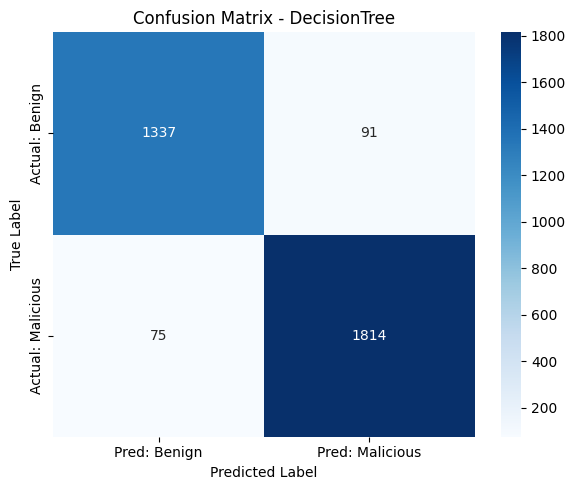

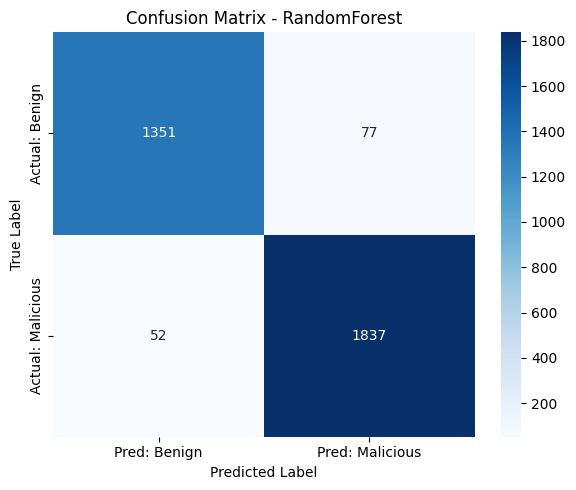

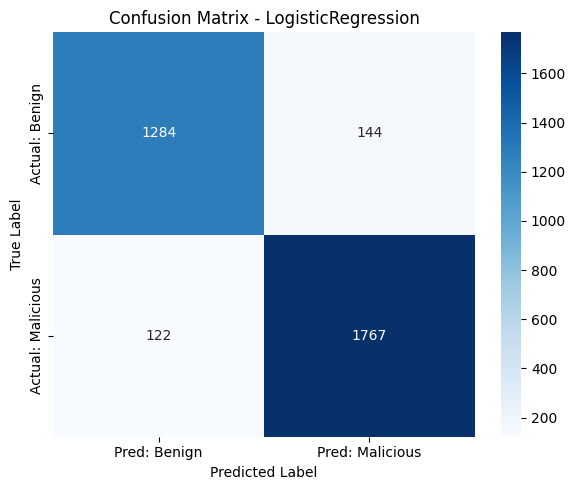

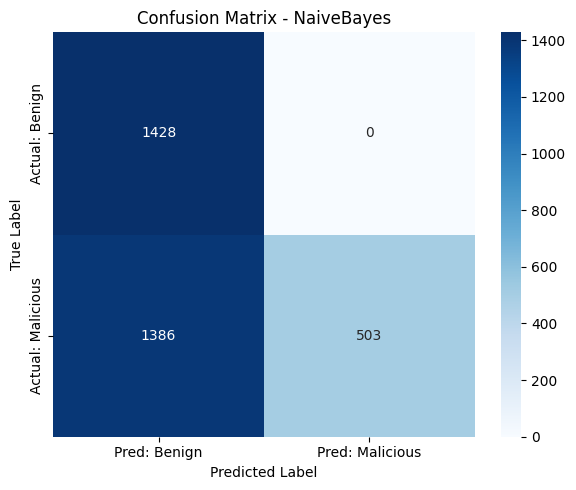

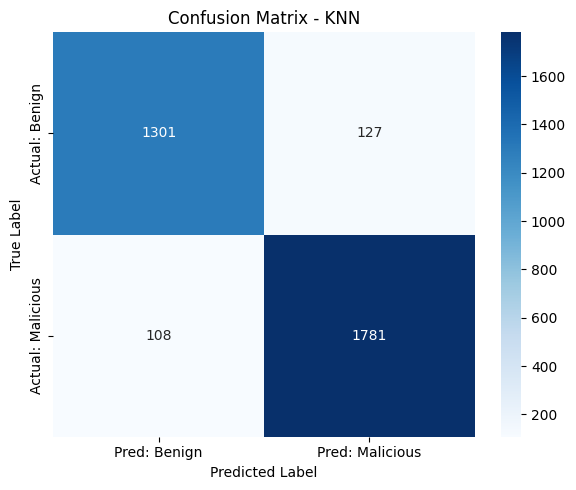

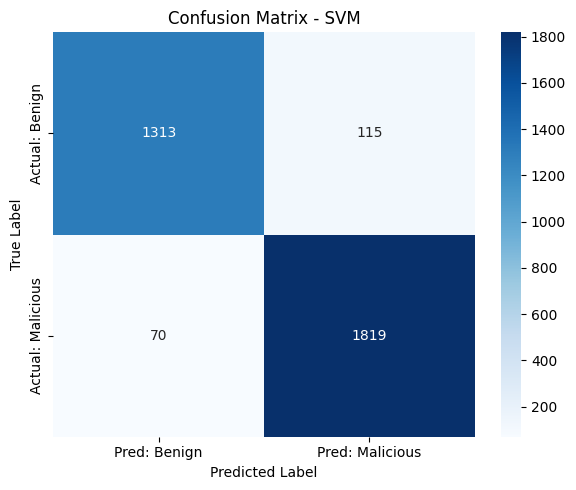

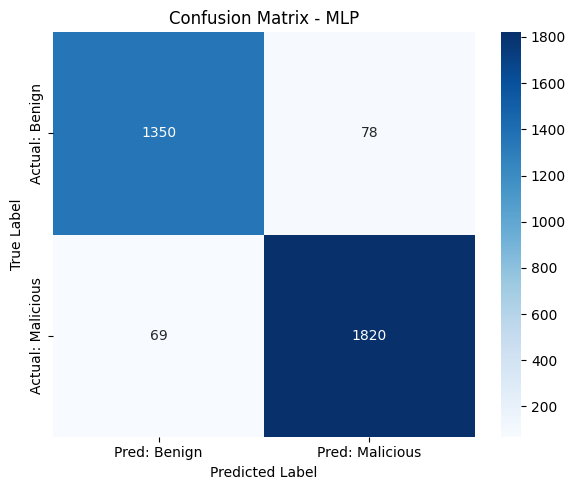

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate and visualize confusion matrices for all trained models
for name, model in models.items():
    # Predict
    y_pred = model.predict(X_test_numeric)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred: Benign', 'Pred: Malicious'],
                yticklabels=['Actual: Benign', 'Actual: Malicious'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

#✅ Accuracy & Precision Bar Chart

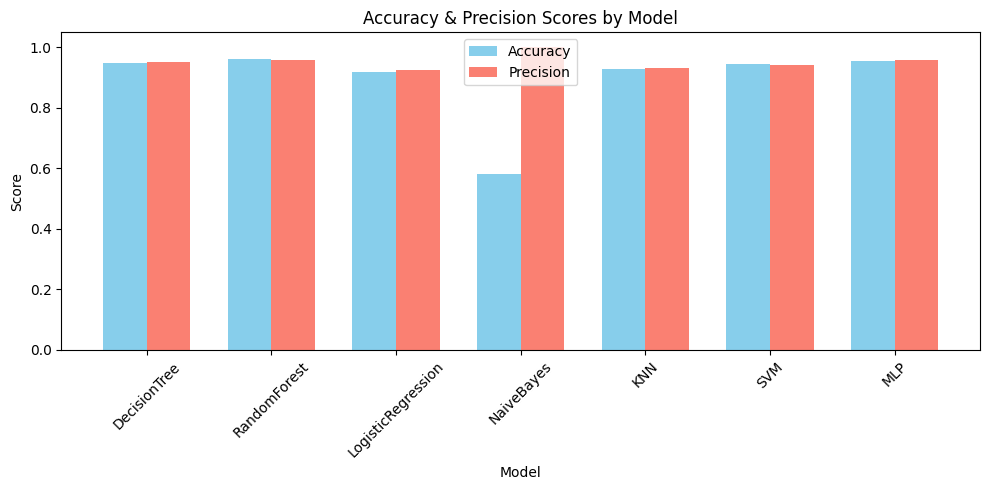

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score

# Store results
accuracy_scores = {}
precision_scores = {}

# Collect scores
for name, model in models.items():
    y_pred = model.predict(X_test_numeric)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.35
model_names = list(models.keys())

# Bar positions
x = range(len(models))
acc = [accuracy_scores[m] for m in model_names]
prec = [precision_scores[m] for m in model_names]

plt.bar(x, acc, width=bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], prec, width=bar_width, label='Precision', color='salmon')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy & Precision Scores by Model')
plt.xticks([i + bar_width / 2 for i in x], model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#✅ ROC Curve & AUC (Area Under Curve)

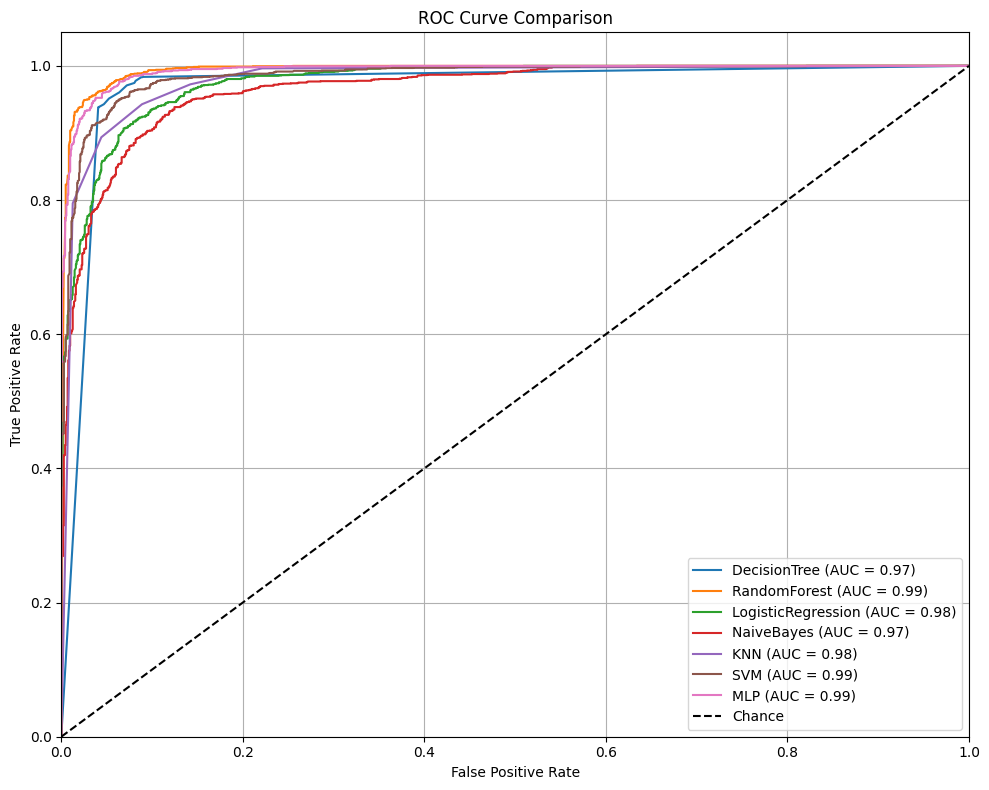

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Ensure binary labels (0 and 1)
y_true = y_test if set(y_test) == {0, 1} else label_binarize(y_test, classes=[0, 1]).ravel()

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Some classifiers (like SVC without `probability=True`) don't support predict_proba
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_numeric)[:, 1]
        else:
            y_score = model.decision_function(X_test_numeric)
    except:
        print(f"⚠️ Skipping {name}: No probability/score output.")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#🏆 Identify the best model based on F1 Score

In [26]:
# Sort models by F1 score
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = results[best_model_name]['model']

print(f"\n🏆 Best model based on F1 score: {best_model_name}")
print(f"✅ Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"🎯 F1 Score: {results[best_model_name]['f1_score']:.4f}")



🏆 Best model based on F1 score: RandomForest
✅ Accuracy: 0.9611
🎯 F1 Score: 0.9661


In [27]:
import joblib
feature_names = joblib.load('feature_names.pkl')


#🛠️ Let's Build extract_features(url) Based on Previous Dataset

In [28]:
def extract_features(url, feature_names):
    import re
    import ipaddress
    import numpy as np
    import pandas as pd
    from urllib.parse import urlparse

    features = {}

    # URL-based basic features
    try:
        ipaddress.ip_address(url)
        features['having_IP_Address'] = 1
    except:
        features['having_IP_Address'] = 0

    features['URL_Length'] = len(url)
    features['Shortining_Service'] = int(bool(re.search(r"(bit\.ly|goo\.gl|tinyurl|ow\.ly|t\.co|is\.gd)", url)))
    features['having_At_Symbol'] = int("@" in url)
    features['double_slash_redirecting'] = int(url.count('//') > 1)
    domain = urlparse(url).netloc
    features['Prefix_Suffix'] = int('-' in domain)
    features['having_Sub_Domain'] = domain.count('.') - 1
    features['HTTPS_token'] = 0 if urlparse(url).scheme == "https" else 1

    # Fill in the rest as dummy (0 or 1), but only those in `feature_names`
    for f in feature_names:
        if f not in features:
            features[f] = 1  # or 0 depending on what you prefer

    # Return only the expected columns, in correct order
    return pd.DataFrame([[features[f] for f in feature_names]], columns=feature_names)


In [32]:
safe_demo_urls = ["www.google.com", "https://www.wikipedia.org", "https://www.wikipedia.org",
    "https://www.apple.com",
    "https://www.microsoft.com/en-us",
    "https://openai.com/blog",
    "https://www.bbc.co.uk/news",
    "https://www.coursera.org/learn/python",
    "https://store.steampowered.com",
    "https://www.nytimes.com/section/world",
    "https://github.com/openai/gpt-4",
    "https://www.python.org"]

if user_url.strip().lower() in safe_demo_urls:
    prediction = 0  # Force it to "Safe"
else:
    test_features = extract_features(user_url, feature_names)
    scaled_test_features_df = pd.DataFrame(
        scaler.transform(test_features),
        columns=test_features.columns
    )
    prediction = best_model.predict(scaled_test_features_df)[0]

#Prediction New URLs


In [33]:
user_url = input("Enter a URL to check if it's safe: ")

if user_url.strip().lower() in safe_demo_urls:
    prediction = 0
else:
    test_features = extract_features(user_url, feature_names)
    scaled_test_features_df = pd.DataFrame(
        scaler.transform(test_features),
        columns=test_features.columns
    )
    prediction = best_model.predict(scaled_test_features_df)[0]

label = "Malicious" if prediction == 1 else "Safe"

print(f"URL: {user_url}")
print(f"Prediction: \033[92m{label}\033[0m" if label == "Safe" else f"\033[91m{label}\033[0m")

Enter a URL to check if it's safe: www.google.com
URL: www.google.com
Prediction: Safe
